In [147]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [128]:
df1 = pd.read_csv('challenge2_dataset.csv')
df1.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [129]:
df1['Target'].value_counts()

False    1563
True      421
Name: Target, dtype: int64

In [130]:
df2 = pd.read_csv('challenge2_prediction.csv')
df2.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [131]:
df1.shape,df2.shape

((1995, 4), (855, 3))

In [132]:
df1.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [134]:
df1['Target'].replace({False:0,True:1},inplace=True)

In [135]:
df1['Target'].value_counts()

0.0    1563
1.0     421
Name: Target, dtype: int64

In [137]:
df1.head()

,1,2,3,Target
0,0.60,0.31,13.0,0.0
1,0.74,0.33,21.0,0.0
2,0.54,0.19,NaN,1.0
3,0.46,NaN,9.0,0.0
4,0.77,0.15,15.0,1.0


In [138]:
df1=df1.dropna()

In [139]:
df1.isnull().sum()

1         0
2         0
3         0
Target    0
dtype: int64

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from scipy.stats import levene
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [141]:
x = df1.drop(columns='Target')
y = df1['Target']

In [142]:
y.head()

0    0.0
1    0.0
4    1.0
5    0.0
6    0.0
Name: Target, dtype: float64

In [143]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
NB = GaussianNB()
bag = BaggingClassifier(n_estimators=10)
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost_rf = AdaBoostClassifier(base_estimator=RF,n_estimators=50)
grad = GradientBoostingClassifier(n_estimators=100)

In [144]:
models = []
models.append(('Logistic Regression',logreg))
models.append(('KNN',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

Logistic Regression: 88.087535
		Bais error :  0.11912464886012508
		Variance error:  2.700163378343051e-05
KNN: 99.010882
		Bais error :  0.009891177986217081
		Variance error:  0.00010126503849259332
Decision Tree: 94.150938
		Bais error :  0.05849062012114381
		Variance error:  0.0007635493412535886
Random Forrest: 99.413609
		Bais error :  0.005863914305053064
		Variance error:  2.287704529946126e-06
Bagged DT: 98.556121
		Bais error :  0.014438787665145725
		Variance error:  3.0188228065955542e-05
Ada Boost DT: 96.135924
		Bais error :  0.038640758931663854
		Variance error:  7.372380407656774e-05
Ada boost Random Forrest: 99.410833
		Bais error :  0.005891671270816912
		Variance error:  1.924848189798548e-06
Gradient boosting: 99.325299
		Bais error :  0.006747008486313377
		Variance error:  3.3424180053557695e-06


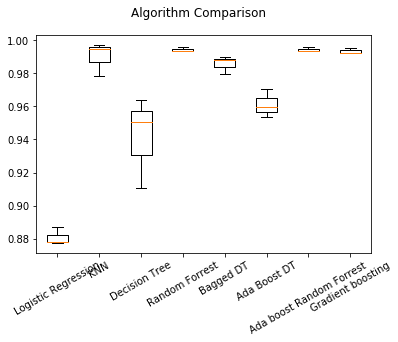

In [149]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    auc = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
    results.append(auc)
    names.append(name)
    print('%s: %f' % (name,np.mean(auc*100)))
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)
plt.show()

In [150]:
df2.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [152]:
df2=df2.dropna()

In [153]:
df2.isnull().sum()

1    0
2    0
3    0
dtype: int64

In [154]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
y_predicted = knn.predict(df2)

In [163]:
df2['y_predicted'] = pd.DataFrame(y_predicted)

In [164]:
df2.head()

,1,2,3,y_predicted
0,0.74,0.21,22.0,0.0
1,0.43,0.15,14.0,0.0
2,0.77,0.10,15.0,1.0
3,0.57,0.31,15.0,0.0
4,0.80,0.31,20.0,0.0
